I'm gonna overwrite a lot of this notebook's old content. I changed the way I'm calculating wt, and wanna test that my training worked. 

In [20]:
from pearce.emulator import OriginalRecipe, ExtraCrispy, SpicyBuffalo
from pearce.mocks import cat_dict
import numpy as np
from os import path

In [21]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [22]:
#training_file = '/scratch/users/swmclau2/xi_zheng07_cosmo_lowmsat/PearceRedMagicXiCosmoFixedNd.hdf5'
training_file = '/u/ki/swmclau2/des/PearceRedMagicXiCosmoFixedNdLowMsat.hdf5'
#test_file = '/scratch/users/swmclau2/xi_zheng07_cosmo_test_lowmsat//PearceRedMagicXiCosmoFixedNd_Test.hdf5'
test_file = '/u/ki/swmclau2/des/PearceRedMagicXiCosmoFixedNdLowMsatTest.hdf5'

em_method = 'gp'
split_method = 'random'

In [23]:
a = 1.0
z = 1.0/a - 1.0

In [24]:
fixed_params = {'z':z}#, 'cosmo': 0}#, 'r':24.06822623}

In [25]:
param_names = ['ombh2', 'omch2', 'w0', 'ns', 'ln10As', 'H0', 'Neff', 'logM0', 'sigma_logM', 'logM1', 'alpha']

In [26]:
kernel_param_names = ['bias', 'amp']
kernel_param_names.extend(param_names)
kernel_param_names.append('amp')
kernel_param_names.extend(param_names)

In [27]:
from collections import defaultdict
metric = {}# defaultdict(list)
for pname in kernel_param_names:
    metric[pname] = 12.0

In [28]:
np.random.seed(0)
emu = SpicyBuffalo(training_file, method = em_method, hyperparams={'metric':metric}, fixed_params=fixed_params,
                 custom_mean_function = 'linear', downsample_factor = 0.1)

40000 18
{}
{'Neff': [1.49655743, -9.94571436], 'amp': [-2.92565173, -10.26944746], 'logM0': [1.17087069, 6.50103759], 'logM1': [-1.91976981, -11.7173251], 'H0': [-4.72773171, -1.33582408], 'w0': [10.0699553, 12.01525603], 'sigma_logM': [0.97997249, 9.70125021], 'bias': [5.30324096], 'omch2': [-2.48246708, 0.50210416], 'ln10As': [0.15083459, 4.78413158], 'alpha': [7.17709699, -0.10738552], 'ns': [-8.69248089, 5.89975769], 'ombh2': [-4.42429766, 10.37865121]}
{'Neff': [1.49655743, -9.94571436], 'amp': [-2.92565173, -10.26944746], 'logM0': [1.17087069, 6.50103759], 'logM1': [-1.91976981, -11.7173251], 'H0': [-4.72773171, -1.33582408], 'w0': [10.0699553, 12.01525603], 'sigma_logM': [0.97997249, 9.70125021], 'bias': [5.30324096], 'omch2': [-2.48246708, 0.50210416], 'ln10As': [0.15083459, 4.78413158], 'alpha': [7.17709699, -0.10738552], 'ns': [-8.69248089, 5.89975769], 'ombh2': [-4.42429766, 10.37865121]}


In [29]:
print emu.get_param_names()

['ombh2', 'omch2', 'w0', 'ns', 'ln10As', 'H0', 'Neff', 'logM0', 'sigma_logM', 'logM1', 'alpha']


In [30]:
emu.scale_bin_centers

array([ 0.09581734,  0.13534558,  0.19118072,  0.27004994,  0.38145568,
        0.53882047,  0.76110414,  1.07508818,  1.51860241,  2.14508292,
        3.03001016,  4.28000311,  6.04566509,  8.53972892, 12.06268772,
       17.0389993 , 24.06822623, 33.99727318])

In [31]:
rbins = np.logspace(-1.1, 1.6, 19)
print (rbins[1:]+rbins[:-1])/2

[ 0.09581733  0.13534558  0.19118072  0.27004994  0.38145568  0.53882047
  0.76110414  1.07508817  1.51860241  2.14508292  3.03001016  4.28000311
  6.04566509  8.53972892 12.06268772 17.0389993  24.06822623 33.99727318]


In [32]:
params = {}
for pname in emu.get_param_names():
    if pname == 'r':
        continue
    low, high = emu.get_param_bounds(pname)
    params[pname] = np.random.uniform(low, high)
    
print params

{'logM1': 14.267701848157271, 'Neff': 3.6095427706197905, 'logM0': 13.578807613765713, 'sigma_logM': 0.2502193887675708, 'H0': 73.31620420249872, 'w0': -0.5886073500474833, 'omch2': 0.10271736946651576, 'ln10As': 3.0459840518637358, 'alpha': 1.031390598923265, 'ns': 0.9832511796584299, 'ombh2': 0.021913242278466367}


In [33]:
pred_y = emu.emulate_wrt_r(params)[0]
print pred_y

[ 2.96883837  2.77415419  2.55127777  2.31075558  2.02684504  1.7753887
  1.50578738  1.4678663   1.36580131  1.12076745  0.88295065  0.7112742
  0.52166097  0.29329069  0.08318182 -0.21237748 -0.44014224 -0.77123954]


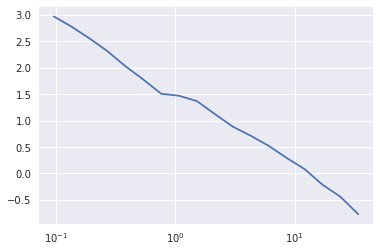

In [34]:
plt.plot(emu.scale_bin_centers, pred_y)
plt.xscale('log')

In [35]:
emu._emulators[0].get_parameter_vector()

array([  5.30324096,  -2.92565173,  -4.42429766,  -2.48246708,
        10.0699553 ,  -8.69248089,   0.15083459,  -4.72773171,
         1.49655743,   1.17087069,   0.97997249,  -1.91976981,
         7.17709699, -10.26944746,  10.37865121,   0.50210416,
        12.01525603,   5.89975769,   4.78413158,  -1.33582408,
        -9.94571436,   6.50103759,   9.70125021, -11.7173251 ,
        -0.10738552])

In [36]:
gof = emu.goodness_of_fit(test_file, statistic = 'frac')
print gof.mean(), np.median(gof)
#for g in gof:
#    print g.mean(), np.median(g)

0.33663589145938133 0.28144723093231006


In [31]:
#print g.mean(), np.median(g)

In [32]:
pred_y, y = emu.goodness_of_fit(test_file, statistic = None)
#print gof.mean(), np.median(gof)

([array([   0.,    0.,    0.,    0.,   13.,  212.,  776., 1590., 2249.,
         2160.]),
  array([   0.,    0.,    0.,    0.,   42.,  370., 1046., 1933., 2465.,
         1144.]),
  array([   0.,    0.,    0.,    3.,  115.,  582., 1377., 2116., 2498.,
          309.]),
  array([   0.,    0.,    0.,   17.,  253.,  877., 1810., 2039., 1911.,
           93.]),
  array([0.000e+00, 0.000e+00, 1.000e+00, 7.400e+01, 4.620e+02, 1.281e+03,
         2.022e+03, 2.039e+03, 1.101e+03, 2.000e+01]),
  array([   0.,    0.,   12.,  199.,  778., 1763., 1902., 1977.,  369.,
            0.]),
  array([   0.,    0.,   67.,  424., 1248., 1922., 1719., 1488.,  132.,
            0.]),
  array([   0.,    0.,    0.,  791., 1909., 1782., 1792.,  700.,   26.,
            0.]),
  array([   0.,    0.,    0., 1273., 2373., 1671., 1484.,  199.,    0.,
            0.]),
  array([   0.,    0.,    0., 2805., 1904., 1720.,  534.,   37.,    0.,
            0.]),
  array([   0.,    0.,   88., 4213., 1871.,  732.,   96.,   

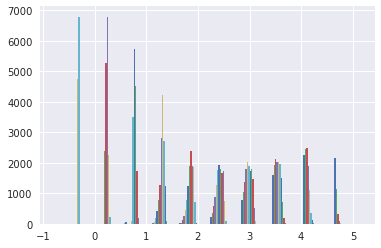

In [33]:
plt.hist(y)

([array([   0.,    0.,    0.,    0.,   11.,  223.,  861., 1719., 2359.,
         1827.]),
  array([   0.,    0.,    0.,    0.,   33.,  404., 1157., 2014., 2593.,
          799.]),
  array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.150e+02, 6.300e+02,
         1.543e+03, 2.075e+03, 2.464e+03, 1.720e+02]),
  array([   0.,    0.,    0.,   14.,  270.,  972., 1917., 2080., 1695.,
           52.]),
  array([0.000e+00, 0.000e+00, 1.000e+00, 8.000e+01, 4.930e+02, 1.415e+03,
         2.008e+03, 2.159e+03, 8.420e+02, 2.000e+00]),
  array([   0.,    0.,   11.,  221.,  852., 1886., 1802., 1982.,  246.,
            0.]),
  array([0.000e+00, 1.000e+00, 7.700e+01, 4.590e+02, 1.394e+03, 1.878e+03,
         1.789e+03, 1.318e+03, 8.400e+01, 0.000e+00]),
  array([   0.,    0.,    3.,  878., 2013., 1687., 1876.,  533.,   10.,
            0.]),
  array([   0.,    0.,    0., 1530., 2263., 1685., 1359.,  163.,    0.,
            0.]),
  array([   0.,    0.,    0., 2977., 1824., 1726.,  451.,   22.,    0.

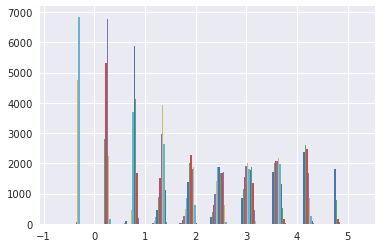

In [34]:
plt.hist(pred_y)

([array([   54.,   244.,   669.,  1732.,  4294., 13807., 17063.,  1914.,
           181.,    23.]),
  array([   44.,   202.,   604.,  1678.,  4281., 14441., 16732.,  1790.,
           208.,    20.]),
  array([   39.,   167.,   521.,  1636.,  4256., 15161., 16247.,  1714.,
           240.,    19.]),
  array([   34.,   153.,   481.,  1525.,  4258., 15969., 15494.,  1804.,
           265.,    17.]),
  array([2.4000e+01, 1.4600e+02, 4.4100e+02, 1.4750e+03, 4.2060e+03,
         1.6723e+04, 1.4807e+04, 1.8930e+03, 2.7200e+02, 1.3000e+01]),
  array([2.2000e+01, 1.3400e+02, 4.1100e+02, 1.4330e+03, 4.1450e+03,
         1.7297e+04, 1.4272e+04, 2.0030e+03, 2.7700e+02, 6.0000e+00]),
  array([   21.,   132.,   404.,  1392.,  4105., 17726., 13868.,  2083.,
           267.,     0.]),
  array([    0.,    48.,   206.,   857.,  4342., 20363., 12008.,  1925.,
           251.,     0.]),
  array([0.0000e+00, 1.0000e+00, 8.3000e+01, 6.4000e+02, 4.9060e+03,
         2.1593e+04, 1.0265e+04, 2.2450e+03, 2.6200

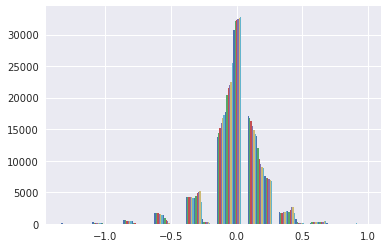

In [35]:
plt.hist(emu.y)

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6097: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 18 x 7000)
  '(shape is %d x %d)' % inp.shape[::-1])


KeyboardInterrupt: 

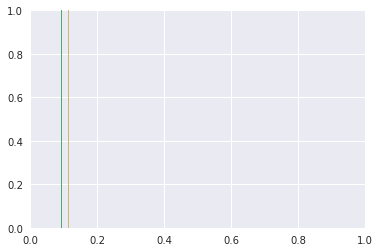

In [36]:
plt.hist(np.log10(gof));

In [ ]:
plt.hist(emu.y)

In [ ]:
for i in xrange(50):    
    params = {}

    for pname in emu.get_param_names():
        if pname == 'r':
            continue
        low, high = emu.get_param_bounds(pname)
        params[pname] = np.random.uniform(low, high)
    pred_y = emu.emulate(params)[0]
    print pred_y
    #print params

In [ ]:
for i, (g, r) in enumerate(zip(gof, emu.scale_bin_centers)):
    print r, g.mean(), np.median(g)
    #plt.hist(np.log10(g))
    #plt.show()

In [ ]:
n_cosmo_params = 7
loo_cosmo = emu.x[0, 0,  :n_cosmo_params]

loo_cosmo_idxs = np.all(emu.x[:, :,:n_cosmo_params] == loo_cosmo, axis =2)
train_x, train_y, train_yerr = emu.x[~loo_cosmo_idxs, :], emu.y[ ~loo_cosmo_idxs], emu.yerr[ ~loo_cosmo_idxs]
test_x, test_y, test_yerr = emu.x[loo_cosmo_idxs, :], emu.y[loo_cosmo_idxs], emu.yerr[loo_cosmo_idxs]

In [ ]:
model = emu._emulator
model.compute(train_x, train_yerr)

In [ ]:
pred_y = model.predict(train_y, test_x, False, False, False)*emu._y_std + emu._y_mean


In [ ]:
np.mean(np.abs((pred_y-test_y)/test_y))
#np.mean(np.abs((pred_y-train_y)/train_y))

In [ ]:
        queue_skipper: True
        system: sherlock
        n_jobs: 400
        max_time: 6
resids = np.abs(emu.y*emu._y_std+emu._y_mean - ypred)

In [ ]:
np.mean(resids/(emu.y*emu._y_std+emu._y_mean))

In [ ]:
ypred.mean(), emu._y_mean

In [ ]:
test_gof = emu.goodness_of_fit(test_file, statistic = 'log_frac')
print test_gof.mean()

In [ ]:
test_gof = emu.goodness_of_fit(test_file, statistic = 'frac')
print test_gof.mean()

In [ ]:
plt.hist(np.log10(test_gof));

In [ ]:
test_x

In [ ]:
(emu.x*emu._x_std) + emu._x_mean

In [ ]:
emu.get_param_names()

In [ ]:
test_x_white, test_y_white = (test_x - emu._x_mean)/(emu._x_std + 1e-5), (test_y - emu._y_mean)/(emu._y_std + 1e-5)

In [ ]:
model = emu._emulator

In [ ]:
pred_y_white = model.predict(emu.y, test_x_white, False, False, False)

In [ ]:
pred_y = pred_y_white*emu._y_std + emu._y_mean

In [ ]:
plt.plot(pred_y[:100], label = 'pred')
plt.plot(test_y[:100], label = 'truth')

plt.legend(loc = 'best')

In [ ]:
test_y.mean(), emu._y_mean, pred_y.mean()

In [ ]:
test_y.std(), emu._y_std, pred_y.std()

In [ ]:
plt.hist(pred_y_white, bins = np.linspace(-3, 3, 100), label = 'Pred')
plt.hist(test_y_white, bins = np.linspace(-3, 3, 100), label = 'Test', alpha = 0.4);
plt.legend(loc = 'best')